# Correlations in Ising Monte Carlo data

In this notebook, we will explore the spin-spin correlations of cofigurations sampled via the classical Monte Carlo simulation found [here](https://github.com/ecasiano/IsingMonteCarlo).

The correlations will be quantified via the correlation function:

\begin{equation}
G(r) = \langle \sigma_0 \sigma_r \rangle
\end{equation}

where $\sigma_0$ is the central spin, and $\sigma_r$ is a spin $r$ lattice units away from the central one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def G(ising_lattice,r):
    
    L = ising_lattice.shape[0]
    N = L**2
    
    G_accum = np.ones(N)
    idx = 0
    for i in range(L):
        for j in range(L):
            
            σ_0 = ising_lattice[i,j]
            
            σ_0σ_right = σ_0*ising_lattice[i,(j+r)%L]
            σ_0σ_left = σ_0*ising_lattice[i,(j-r)%L]
            σ_0σ_down = σ_0*ising_lattice[(i+r)%L,j]
            σ_0σ_up = σ_0*ising_lattice[(i-r)%L,j]
            
            G_accum[idx] = (σ_0σ_right+σ_0σ_left+σ_0σ_down+σ_0σ_up)/4
            idx += 1

    G_average = np.mean(G_accum)
    G_stderr = np.std(G_accum)/np.sqrt(N)
    
    return G_average,G_stderr

In [3]:
# Load Monte Carlo data
filename = './ising_monte_carlo_data/L_10_T_4.0_spins.dat'
data = np.loadtxt(filename)[31999:]
data

array([[-1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1.,  1.],
       [ 1., -1., -1., ...,  1., -1., -1.],
       ...,
       [ 1.,  1.,  1., ..., -1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1., -1.,  1.],
       [ 1.,  1.,  1., ..., -1., -1.,  1.]])

In [4]:
# Grab temperature from file name
T = float(filename.split('_')[-2])

In [5]:
# Reshape each row for compatibility with correlation function definition
L = int(np.sqrt(data[0].shape[0]))
N = L**2
mc_data = [row.reshape(L,L) for row in data]

In [6]:
# Compute correlation function for r = 1 ; G(r=1)
G(mc_data[0],r=1)

(0.26, 0.04715930449020638)

In [7]:
# Compute G(r=1) for all samples
G1 = np.ones(len(mc_data))
for i,config in enumerate(mc_data):
    G1[i] = G(config,r=1)[0]
    
print("G(r=1) = %.4f +/- %.4f"%(np.mean(G1),np.std(G1)/np.sqrt(G1.shape[0])))

G(r=1) = 0.2782 +/- 0.0002


In [8]:
# Compute G(r) for all lengths r=1,...,L/2
max_length = L//2
Gr = np.ones((max_length+1,len(mc_data)))
for r in range(max_length+1):
    for i,config in enumerate(mc_data):
        Gr[r][i] = G(config,r=r)[0]
    
    print("G(r=%d) = %.4f +/- %.4f"%(r,np.mean(Gr[r]),np.std(Gr[r])/np.sqrt(G1.shape[0])))

G(r=0) = 1.0000 +/- 0.0000
G(r=1) = 0.2782 +/- 0.0002
G(r=2) = 0.0857 +/- 0.0002
G(r=3) = 0.0287 +/- 0.0003
G(r=4) = 0.0106 +/- 0.0003
G(r=5) = 0.0064 +/- 0.0003


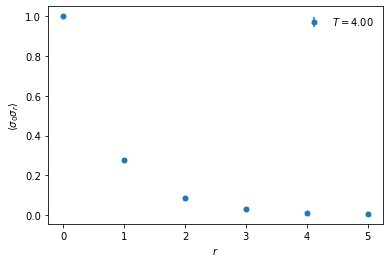

In [9]:
# Plot correlation function at all lengths
Gr_mean = np.mean(Gr,axis=1)
Gr_err = np.std(Gr,axis=1)/np.sqrt(Gr[0].shape[0])
plt.errorbar(range(max_length+1),Gr_mean,yerr=Gr_err,fmt='.',ms=10,label=r'$T=%.2f$'%T);
plt.ylabel(r'$\langle \sigma_0 \sigma_r \rangle$')
plt.xlabel(r'$r$')
plt.legend(frameon=False);

In [46]:
# List of temperatures
temp_list = ['0.25','1.25','2.25','3.25','4.0']

# Compare for some different temperatures
GT_mean = np.ones((len(temp_list),L//2+1))
GT_err = np.ones((len(temp_list),L//2+1))

for temp_idx,temp in enumerate(temp_list):

    print('T = :',temp)
    
    # Load Monte Carlo data
    filename = './ising_monte_carlo_data/L_10_T_'+temp+'_spins.dat'
    data = np.loadtxt(filename)[80000:]

    # Grab temperature from file name
    T = float(filename.split('_')[-2])
    
    # Reshape each row for compatibility with correlation function definition
    L = int(np.sqrt(data[0].shape[0]))
    N = L**2
    mc_data = [row.reshape(L,L) for row in data]
    
    # Compute G(r) for all lengths r=1,...,L/2
    max_length = L//2
    Gr = np.ones((max_length+1,len(mc_data)))
    for r in range(max_length+1):
        for i,config in enumerate(mc_data):
            Gr[r][i] = G(config,r=r)[0]

        print("G(r=%d) = %.4f +/- %.4f"%(r,np.mean(Gr[r]),np.std(Gr[r])/np.sqrt(G1.shape[0])))
                
    print('\n')
    # Plot correlation function at all lengths
#     plt.errorbar(range(max_length+1),Gr_mean,yerr=Gr_err,fmt='.',ms=10,label=r'$T=%.2f$'%T);
#     plt.ylabel(r'$\langle \sigma_0 \sigma_r \rangle$')
#     plt.xlabel(r'$r$')
#     plt.legend(frameon=False);
    
    # Save results for later plotting
    Gr_mean = np.mean(Gr,axis=1)
    Gr_err = np.std(Gr,axis=1)/np.sqrt(Gr[0].shape[0])
    GT_mean[temp_idx] = Gr_mean
    GT_err[temp_idx] = Gr_err

T = : 0.25
G(r=0) = 1.0000 +/- 0.0000
G(r=1) = 1.0000 +/- 0.0000
G(r=2) = 1.0000 +/- 0.0000
G(r=3) = 1.0000 +/- 0.0000
G(r=4) = 1.0000 +/- 0.0000
G(r=5) = 1.0000 +/- 0.0000


T = : 1.25
G(r=0) = 1.0000 +/- 0.0000
G(r=1) = 0.9924 +/- 0.0001
G(r=2) = 0.9921 +/- 0.0001
G(r=3) = 0.9921 +/- 0.0001
G(r=4) = 0.9921 +/- 0.0001
G(r=5) = 0.9921 +/- 0.0001


T = : 2.25
G(r=0) = 1.0000 +/- 0.0000
G(r=1) = 0.7504 +/- 0.0003
G(r=2) = 0.6688 +/- 0.0005
G(r=3) = 0.6349 +/- 0.0007
G(r=4) = 0.6200 +/- 0.0007
G(r=5) = 0.6156 +/- 0.0007


T = : 3.25
G(r=0) = 1.0000 +/- 0.0000
G(r=1) = 0.3661 +/- 0.0003
G(r=2) = 0.1552 +/- 0.0003
G(r=3) = 0.0747 +/- 0.0003
G(r=4) = 0.0426 +/- 0.0004
G(r=5) = 0.0341 +/- 0.0004


T = : 4.0
G(r=0) = 1.0000 +/- 0.0000
G(r=1) = 0.2783 +/- 0.0002
G(r=2) = 0.0861 +/- 0.0003
G(r=3) = 0.0290 +/- 0.0003
G(r=4) = 0.0106 +/- 0.0003
G(r=5) = 0.0065 +/- 0.0003




In [47]:
GT_mean

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 0.99243725, 0.992084  , 0.992067  , 0.99206675,
        0.992068  ],
       [1.        , 0.750419  , 0.6687655 , 0.63494025, 0.619989  ,
        0.615558  ],
       [1.        , 0.3660995 , 0.1552085 , 0.074716  , 0.0426315 ,
        0.0340795 ],
       [1.        , 0.27831725, 0.08605575, 0.029046  , 0.01058825,
        0.0065365 ]])

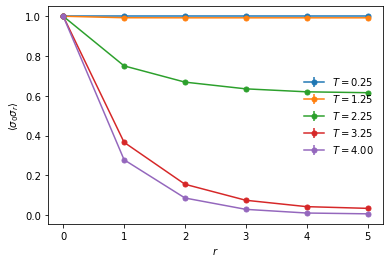

In [48]:
# Modify plot and save
for i,results in enumerate(GT_mean):
    plt.errorbar(range(max_length+1),GT_mean[i],yerr=GT_err[i],fmt='.-',
                 ms=10,label=r'$T=%.2f$'%float(temp_list[i]));
plt.ylabel(r'$\langle \sigma_0 \sigma_r \rangle$')
plt.xlabel(r'$r$')
plt.legend(frameon=False);
plt.savefig('L10_Tsweep_corr.pdf',dpi=300)

# Comparison between paper dataset and mine

In [A high-bias, low-variance introduction to Machine Learning for physicists](https://arxiv.org/pdf/1803.08823.pdf), they use a similar Ising dataset to ours, with the following parameters:

```L=40``` 

```T=[0.25,0.50,...,4.00]```

```N_samples = 160,000```

We want to compare the quality of ours and their dataset in various ways. The first, is to compute the correlation function at fixed values of temperature:

## Our data

In [59]:
# List of temperatures
temp_list = ['4.0']

L = 40
# Compare for some different temperatures
GT_mean_40 = np.ones((len(temp_list),L//2+1))
GT_err_40 = np.ones((len(temp_list),L//2+1))
for temp_idx,temp in enumerate(temp_list):

    print('T = :',temp)
    
    # Load Monte Carlo data
    filename = './ising_monte_carlo_data/L_40_T_'+temp+'_spins.dat'
    data = np.loadtxt(filename)[150000:]

    # Grab temperature from file name
    T = float(filename.split('_')[-2])
    
    # Reshape each row for compatibility with correlation function definition
    L = int(np.sqrt(data[0].shape[0]))
    N = L**2
    mc_data = [row.reshape(L,L) for row in data]
    
    # Compute G(r) for all lengths r=1,...,L/2
    max_length = L//2
    Gr = np.ones((max_length+1,len(mc_data)))
    for r in range(max_length+1):
        for i,config in enumerate(mc_data):
            Gr[r][i] = G(config,r=r)[0]

        print("G(r=%d) = %.4f +/- %.4f"%(r,np.mean(Gr[r]),np.std(Gr[r])/np.sqrt(Gr.shape[0])))
                
    print('\n')
    # Plot correlation function at all lengths
#     plt.errorbar(range(max_length+1),Gr_mean,yerr=Gr_err,fmt='.',ms=10,label=r'$T=%.2f$'%T);
#     plt.ylabel(r'$\langle \sigma_0 \sigma_r \rangle$')
#     plt.xlabel(r'$r$')
#     plt.legend(frameon=False);
    
    # Save results for later plotting
    Gr_mean = np.mean(Gr,axis=1)
    Gr_err = np.std(Gr,axis=1)/np.sqrt(Gr[0].shape[0])
    GT_mean_40[temp_idx] = Gr_mean
    GT_err_40[temp_idx] = Gr_err

T = : 4.0
G(r=0) = 1.0000 +/- 0.0000
G(r=1) = 0.2789 +/- 0.0045
G(r=2) = 0.0858 +/- 0.0049
G(r=3) = 0.0285 +/- 0.0048
G(r=4) = 0.0099 +/- 0.0047
G(r=5) = 0.0036 +/- 0.0047
G(r=6) = 0.0011 +/- 0.0047
G(r=7) = 0.0005 +/- 0.0046
G(r=8) = 0.0003 +/- 0.0046
G(r=9) = -0.0001 +/- 0.0046
G(r=10) = -0.0003 +/- 0.0046
G(r=11) = -0.0002 +/- 0.0047
G(r=12) = -0.0001 +/- 0.0046
G(r=13) = -0.0004 +/- 0.0046
G(r=14) = -0.0004 +/- 0.0047
G(r=15) = -0.0005 +/- 0.0046
G(r=16) = -0.0001 +/- 0.0046
G(r=17) = -0.0002 +/- 0.0047
G(r=18) = 0.0000 +/- 0.0048
G(r=19) = -0.0002 +/- 0.0052
G(r=20) = -0.0003 +/- 0.0066




In [60]:
GT_mean_40

array([[ 1.000000e+00,  2.788630e-01,  8.579500e-02,  2.849525e-02,
         9.936375e-03,  3.594750e-03,  1.120000e-03,  5.360000e-04,
         3.472500e-04, -8.625000e-05, -3.265000e-04, -1.896250e-04,
        -8.450000e-05, -3.915000e-04, -4.072500e-04, -4.585000e-04,
        -6.612500e-05, -1.997500e-04,  3.550000e-05, -1.742500e-04,
        -2.845000e-04]])

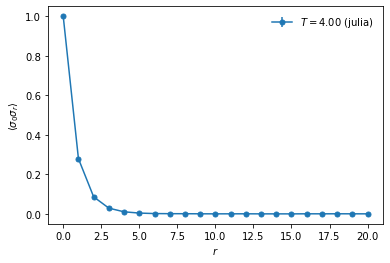

In [62]:
# Modify plot and save
for i,results in enumerate(temp_list):
    plt.errorbar(range(max_length+1),GT_mean_40[i],yerr=GT_err_40[i],fmt='.-',
                 ms=10,label=r'$T=%.2f$ (julia)'%float(temp_list[i]));
plt.ylabel(r'$\langle \sigma_0 \sigma_r \rangle$')
plt.xlabel(r'$r$')
plt.legend(frameon=False);
plt.savefig('L40_Tsweep_corr.pdf',dpi=300)

## Their data

## Autocorrelation time